In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('../data/raw/base_maturidade_final.csv', usecols=lambda column: column != 'Unnamed: 0')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   clientes_ativos         10000 non-null  int64  
 1   faturamento_mensal      10000 non-null  int64  
 2   faturamento_acumulado   10000 non-null  int64  
 3   anos_empresa            10000 non-null  float64
 4   tipo_servico            10000 non-null  object 
 5   ticket_medio            10000 non-null  float64
 6   mix_receita             10000 non-null  object 
 7   canais_vendas           10000 non-null  int64  
 8   churn                   10000 non-null  float64
 9   parcerias               10000 non-null  object 
 10  investimento_externo    10000 non-null  object 
 11  branding_reputacao      10000 non-null  object 
 12  network_time            10000 non-null  object 
 13  uso_tecnologia          10000 non-null  object 
 14  roadmap_produto         10000 non-null 

In [53]:
for col in df.select_dtypes(include=['object']).columns:
    print(f'Coluna: {col}')
    print(df[col].unique())
    print()


Coluna: tipo_servico
['Serviço' 'Produto']

Coluna: mix_receita
['3–5 clientes >50%' 'Receita diversificada' '1–2 clientes >50%']

Coluna: parcerias
['Algumas' 'Poucas' 'Muitas' 'Nenhuma']

Coluna: investimento_externo
['Série A+' 'Aceleradora/Anjo' 'Não' 'Seed/Pré-Série A']

Coluna: branding_reputacao
['Reconhecimento forte' 'Não reconhecida' 'Algum reconhecimento']

Coluna: network_time
['Sim, forte' 'Ocasionalmente' 'Não']

Coluna: uso_tecnologia
['Alto' 'Médio' 'Baixo']

Coluna: roadmap_produto
['Parcial' 'Não existe' 'Claro e executado']

Coluna: eficiencia_operacional
['Parcialmente' 'Quase tudo' 'Quase nada']

Coluna: escala_tecnologica
['Parcialmente' 'Não' 'Sim']

Coluna: financas_unidade
['Algumas' 'Não' 'Sim, regularmente']

Coluna: experiencia_lideranca
['Experiência forte' 'Sem experiência' 'Experiência parcial']

Coluna: treinamento
['Às vezes' 'Regularmente' 'Nunca']

Coluna: governanca_financeira
['Não existem controles' 'DRE e auditoria' 'Controles básicos']



In [56]:
df['score_total'].value_counts().sort_index(ascending=False)

score_total
88.93    1
86.38    1
83.13    1
83.02    1
82.96    1
        ..
29.44    1
29.27    2
28.07    1
28.01    1
27.08    2
Name: count, Length: 3666, dtype: int64

In [57]:
# Quantos valores eu tenho nos intervalos de score total de 0-20, 21-40, 41-60, 61-80, 81-100
bins = [0, 20, 40, 60, 80, 100]
labels = ['0-20', '21-40', '41-60', '61-80', '81-100']
df['score_total_binned'] = pd.cut(df['score_total'], bins=bins, labels=labels, include_lowest=True)
df['score_total_binned'].value_counts().sort_index(ascending=False)

score_total_binned
81-100      20
61-80     2253
41-60     6182
21-40     1545
0-20         0
Name: count, dtype: int64

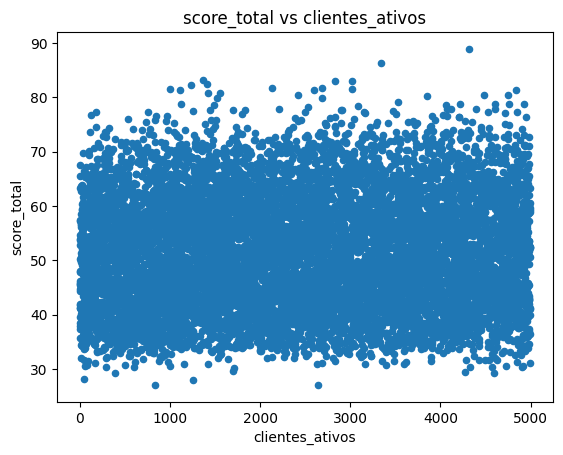

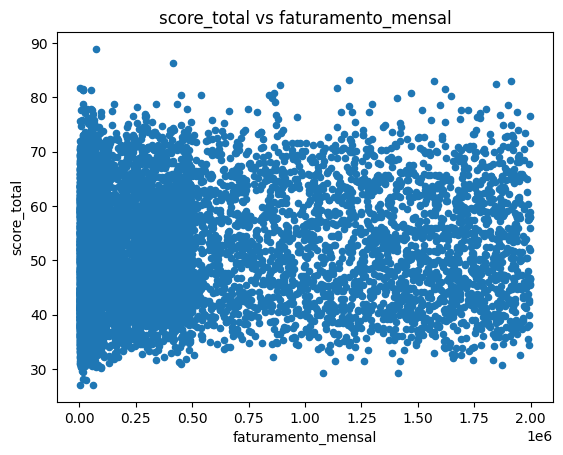

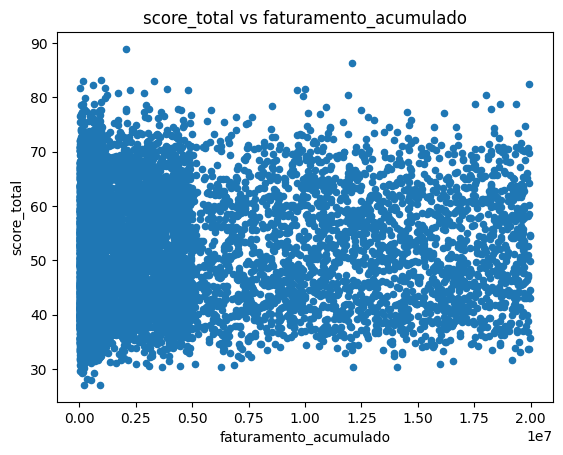

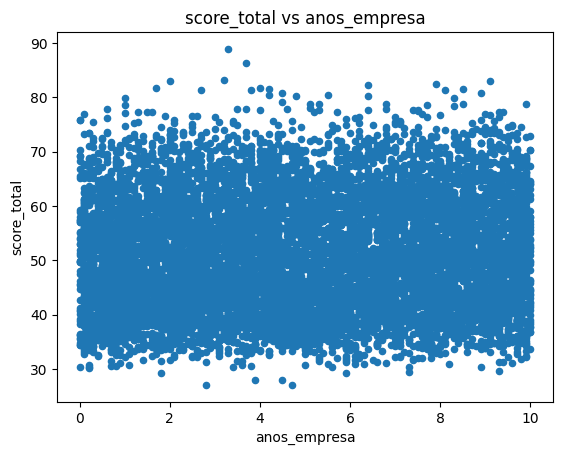

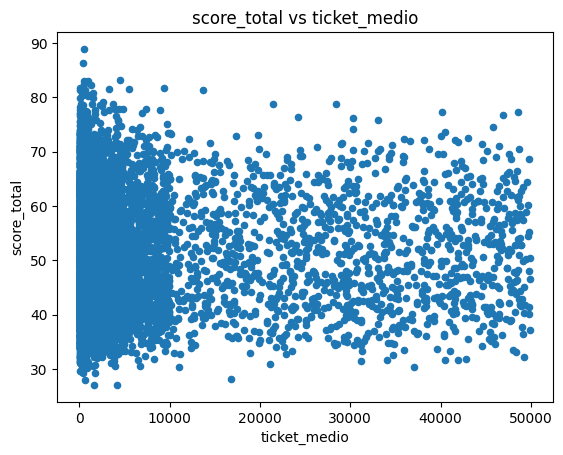

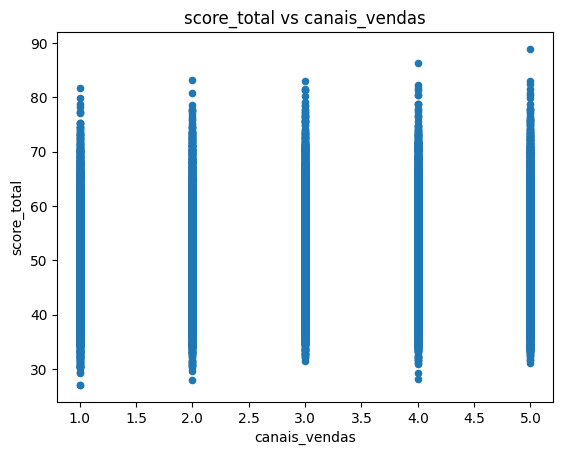

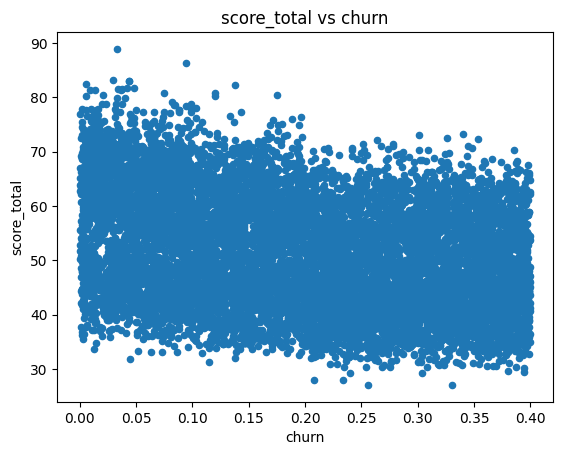

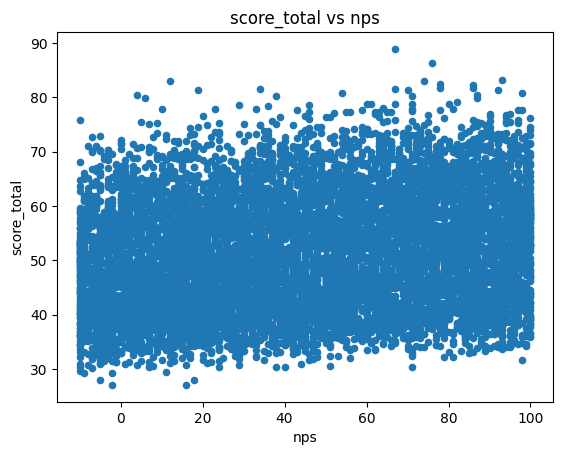

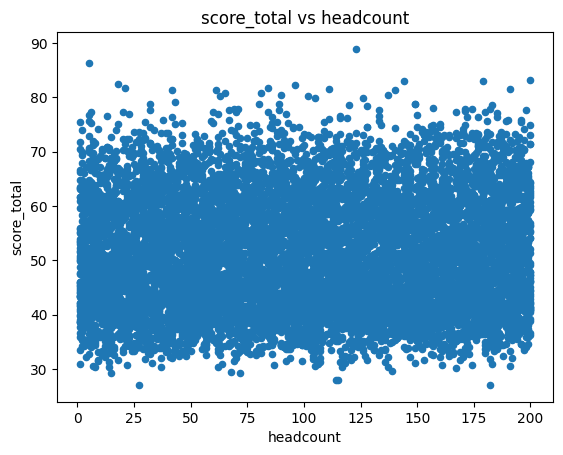

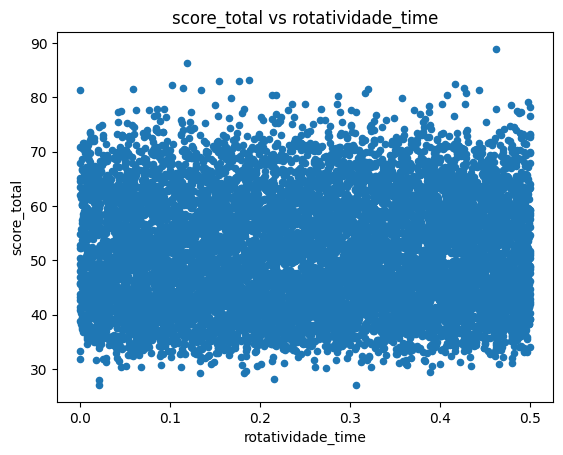

In [58]:
# Scatter plot de cada coluna numerica em relacao ao score total
for col in df.select_dtypes(include=['number']).columns:
    if col != 'score_total':
        df.plot(kind='scatter', x=col, y='score_total', title=f'score_total vs {col}')
        plt.show()

___
#### Identificando Multicolinearidade Distribuição das variáveis com dados já processados

In [7]:
# chama os df de treino e validação
x_train = pd.read_csv('../data/processed/x_train_encoded.csv')
x_val = pd.read_csv('../data/processed/x_validation_encoded.csv')
y_train = pd.read_csv('../data/processed/y_train.csv').values.ravel()
y_val = pd.read_csv('../data/processed/y_validation.csv').values.ravel()
x_test = pd.read_csv('../data/processed/x_test_encoded.csv')
y_test = pd.read_csv('../data/processed/y_test.csv').values.ravel()

# junte todos os df de treino, validação e teste
# x_train e y_train
x_train['score_total'] = y_train
x_val['score_total'] = y_val
x_test['score_total'] = y_test

df_full = pd.concat([x_train, x_val, x_test], axis=0)
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0 to 2499
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   tipo_servico_Serviço    10000 non-null  float64
 1   mix_receita             10000 non-null  float64
 2   parcerias               10000 non-null  float64
 3   investimento_externo    10000 non-null  float64
 4   branding_reputacao      10000 non-null  float64
 5   network_time            10000 non-null  float64
 6   uso_tecnologia          10000 non-null  float64
 7   roadmap_produto         10000 non-null  float64
 8   eficiencia_operacional  10000 non-null  float64
 9   escala_tecnologica      10000 non-null  float64
 10  financas_unidade        10000 non-null  float64
 11  experiencia_lideranca   10000 non-null  float64
 12  treinamento             10000 non-null  float64
 13  governanca_financeira   10000 non-null  float64
 14  headcount               10000 non-null  floa

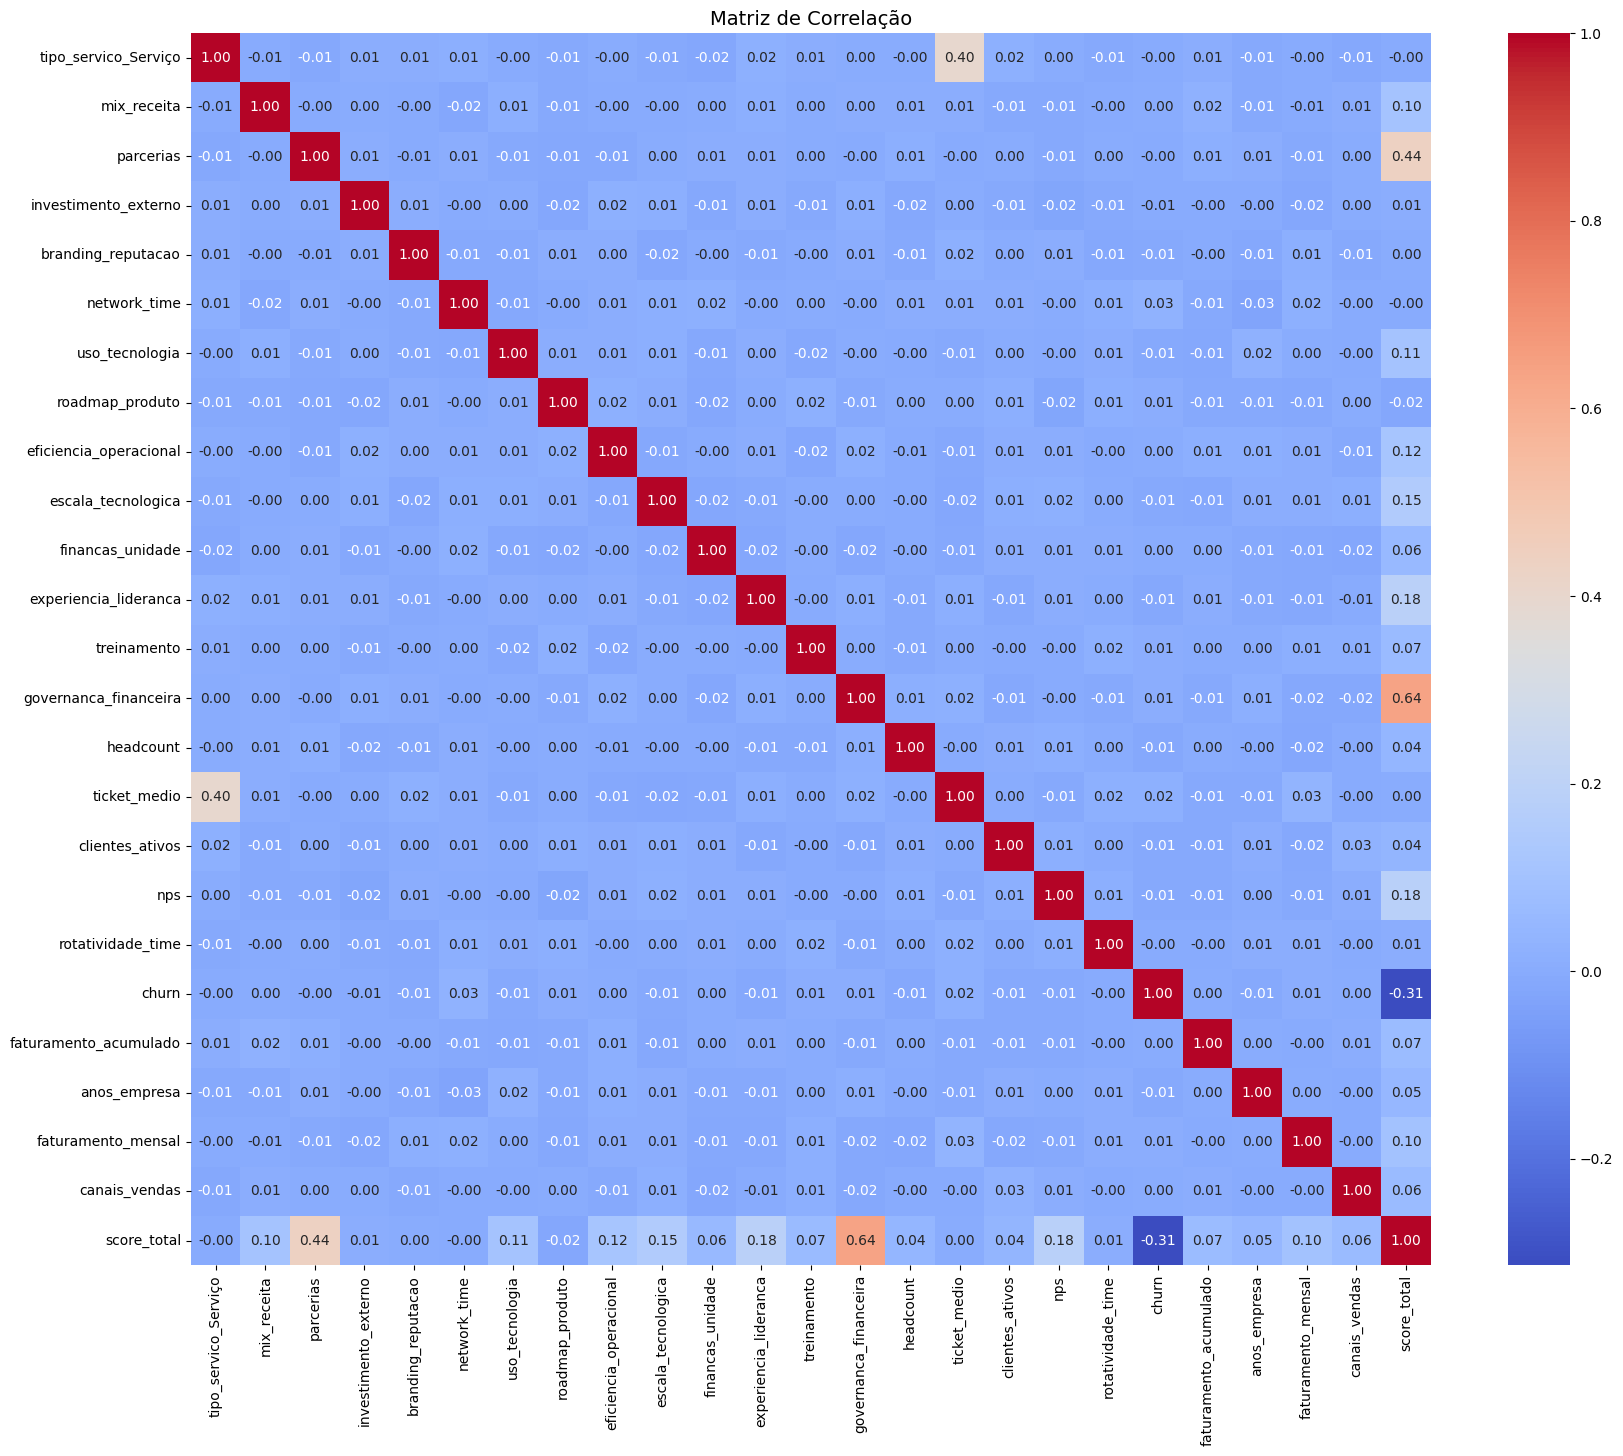

In [11]:
import seaborn as sns
# Supondo que seu dataframe seja df
plt.figure(figsize=(20,16))
sns.heatmap(df_full.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação", fontsize=14)
plt.show()

A maioria das variáveis apresenta baixa correlação entre si (próxima de zero), o que é positivo → significa baixa multicolinearidade.

Algumas correlações chamam atenção:

- governanca_financeira vs. score_total (0.64) → correlação moderada-forte, possivelmente variável importante para o modelo.

- mix_receita vs. score_total (0.44) → também tem influência significativa.

- ticket_medio vs. tipo_servico (0.40) → pode haver relação estrutural entre o tipo de serviço e o ticket médio.

- churn vs. score_total (-0.31) → correlação negativa, empresas com maior score tendem a ter menor churn.

Nenhuma correlação próxima de 0.9 ou maior → sem risco forte de multicolinearidade que comprometa o modelo.

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Selecionar apenas colunas numéricas para calcular VIF
X = df_full.select_dtypes(include=['float64','int64'])
X = add_constant(X)  # adiciona constante para o cálculo
# retira a coluna score_total
X = X.drop(columns=['score_total'])

vif = pd.DataFrame()
vif["Variável"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif

,Variável,VIF
0,const,22.375230
1,tipo_servico_Serviço,1.188624
2,mix_receita,1.001626
3,parcerias,1.001431
4,investimento_externo,1.002818
5,branding_reputacao,1.002039
6,network_time,1.003533
7,uso_tecnologia,1.001932
8,roadmap_produto,1.002978
9,eficiencia_operacional,1.002591


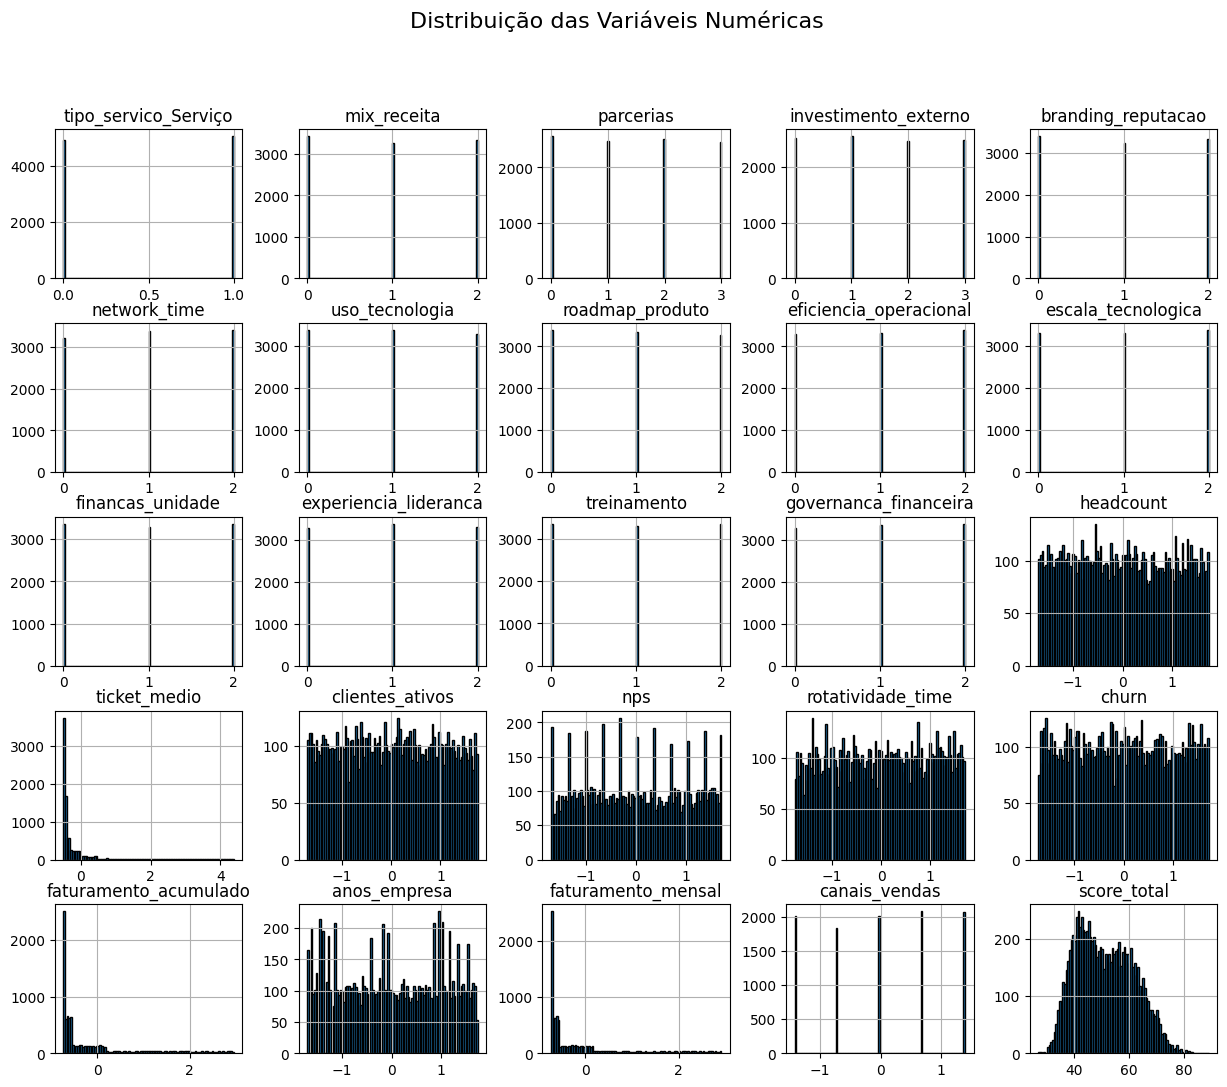

In [22]:
num_cols = df_full.select_dtypes(include=['float64','int64']).columns

df_full[num_cols].hist(figsize=(15,12), bins=100, edgecolor='black')
plt.suptitle("Distribuição das Variáveis Numéricas", fontsize=16)
plt.show()


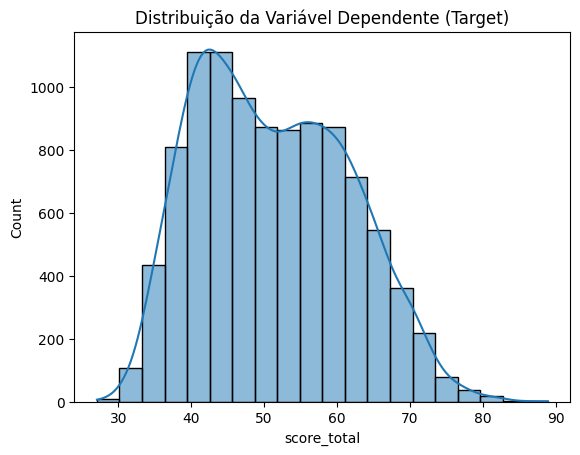

In [20]:
sns.histplot(df_full['score_total'], kde=True, bins=20)
plt.title("Distribuição da Variável Dependente (Target)")
plt.show()
